<a href="https://colab.research.google.com/github/chrisnelsonlab/BMEG49803_2025/blob/main/W5_BMEG4983.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://brand.uark.edu/_resources/images/UA_Logo_Horizontal.jpg width="400" height="96">

####BMEG 4983 - Genome Engineering and Synthetic Biology -
####For more information, check out the Nelson lab for Therapeutic Genome Engineering (https://nelsonlab.uark.edu/)

For image credits, see the linked URL

#5. Data Workshop 5 - Primer design, qPCR, and pandas

The goal for today is to be able to design primers for PCR and RT-PCR and be able to do analysis on quantitative PCR

Update 3/5/2025

# 5.1 PCR principle

<img src=https://upload.wikimedia.org/wikipedia/commons/a/ab/Polymerase_chain_reaction-en.svg width="800">
Credit wiki

Polymerase chain reaction works by using a DNA polymerase (copying enzyme), to directly copy a sequence of DNA. Each round, the polymerase enzymes add dNTPs (the nucleotides) extending the primer sequences (a sequence you specify)

Each round you (ideally) get 2 times the input. This exponential growth allows us to make a large amount of DNA or detect very rare sequences.

The two applications we will discuss today for PCR are:

1. **Cloning** - use PCR to make many copies of a sequence that we need to use for bioengineering applications

2. **Detection and quantification** - use PCR (or quantitative PCR) to quantify the original number of a specific gene. This can be used to tell you how frequent a specific transcript was inside a group of cells (or other genomics applications).



# 5.2 Primer designs for cloning
<img src=https://media.addgene.org/data/easy-thumbnails/filer_public/cms/filer_public/f4/a4/f4a45260-23ea-40bc-a7b1-4fc4526abf95/pcr-based-cloning.gif__800.0x346.0_crop_subsampling-2_upscale.png width="800">
Credit addgene


Molecular cloning can be used to place your gene of interest (YGOI, in figure), into a plasmid DNA that can be transfected into cells to investigate the gene's function.

In the figure above, a gene is being moved from a donor plasmid to a recipient plasmid. You can also use PCR to specifically amplify your gene from the RNA of the organism.

We can design primers to specifically amplify our gene from the start codon (ATG) to the stop codon. Typically you will leave out the 5' and 3' untranslated regions to conserve space.

We will also need to add some sequence information to each side. PCR allows us to add sequence on the 5' end of the primer. You can do this on both the forward and reverse primer. Let's work through an example:




## 5.2.1 Primer overhangs for cloning a cDNA

Let's work through GAPDH as an example. First we need the cDNA sequence for GAPDH.

This is the whole sequence (including UTRs)
```
GCTCTCTGCTCCTCCTGTTCGACAGTCAGCCGCATCTTCTTTTGCGTCGCCAGCCGAGCC
ACATCGCTCAGACACCATGGGGAAGGTGAAGGTCGGAGTCAACGGATTTGGTCGTATTGG
GCGCCTGGTCACCAGGGCTGCTTTTAACTCTGGTAAAGTGGATATTGTTGCCATCAATGA
CCCCTTCATTGACCTCAACTACATGGTTTACATGTTCCAATATGATTCCACCCATGGCAA
ATTCCATGGCACCGTCAAGGCTGAGAACGGGAAGCTTGTCATCAATGGAAATCCCATCAC
CATCTTCCAGGAGCGAGATCCCTCCAAAATCAAGTGGGGCGATGCTGGCGCTGAGTACGT
CGTGGAGTCCACTGGCGTCTTCACCACCATGGAGAAGGCTGGGGCTCATTTGCAGGGGGG
AGCCAAAAGGGTCATCATCTCTGCCCCCTCTGCTGATGCCCCCATGTTCGTCATGGGTGT
GAACCATGAGAAGTATGACAACAGCCTCAAGATCATCAGCAATGCCTCCTGCACCACCAA
CTGCTTAGCACCCCTGGCCAAGGTCATCCATGACAACTTTGGTATCGTGGAAGGACTCAT
GACCACAGTCCATGCCATCACTGCCACCCAGAAGACTGTGGATGGCCCCTCCGGGAAACT
GTGGCGTGATGGCCGCGGGGCTCTCCAGAACATCATCCCTGCCTCTACTGGCGCTGCCAA
GGCTGTGGGCAAGGTCATCCCTGAGCTGAACGGGAAGCTCACTGGCATGGCCTTCCGTGT
CCCCACTGCCAACGTGTCAGTGGTGGACCTGACCTGCCGTCTAGAAAAACCTGCCAAATA
TGATGACATCAAGAAGGTGGTGAAGCAGGCGTCGGAGGGCCCCCTCAAGGGCATCCTGGG
CTACACTGAGCACCAGGTGGTCTCCTCTGACTTCAACAGCGACACCCACTCCTCCACCTT
TGACGCTGGGGCTGGCATTGCCCTCAACGACCACTTTGTCAAGCTCATTTCCTGGTATGA
CAACGAATTTGGCTACAGCAACAGGGTGGTGGACCTCATGGCCCACATGGCCTCCAAGGA
GTAAGACCCCTGGACCACCAGCCCCAGCAAGAGCACAAGAGGAAGAGAGAGACCCTCACT
GCTGGGGAGTCCCTGCCACACTCAGTCCCCCACCACACTGAATCTCCCCTCCTCACAGTT
GCCATGTAGACCCCTTGAAGAGGGGAGGGGCCTAGGGAGCCGCACCTTGTCATGTACCAT
CAATAAAGTACCCTGTGCTCAACCA
```
From start codon to stop looks like:
```
ATGGGGAAGGTGAAGGTCGGAGTCAACGGATTTGGTCGTATTGGGCGCCTGGTCACCAGG
GCTGCTTTTAACTCTGGTAAAGTGGATATTGTTGCCATCAATGACCCCTTCATTGACCTC
AACTACATGGTTTACATGTTCCAATATGATTCCACCCATGGCAAATTCCATGGCACCGTC
AAGGCTGAGAACGGGAAGCTTGTCATCAATGGAAATCCCATCACCATCTTCCAGGAGCGA
GATCCCTCCAAAATCAAGTGGGGCGATGCTGGCGCTGAGTACGTCGTGGAGTCCACTGGC
GTCTTCACCACCATGGAGAAGGCTGGGGCTCATTTGCAGGGGGGAGCCAAAAGGGTCATC
ATCTCTGCCCCCTCTGCTGATGCCCCCATGTTCGTCATGGGTGTGAACCATGAGAAGTAT
GACAACAGCCTCAAGATCATCAGCAATGCCTCCTGCACCACCAACTGCTTAGCACCCCTG
GCCAAGGTCATCCATGACAACTTTGGTATCGTGGAAGGACTCATGACCACAGTCCATGCC
ATCACTGCCACCCAGAAGACTGTGGATGGCCCCTCCGGGAAACTGTGGCGTGATGGCCGC
GGGGCTCTCCAGAACATCATCCCTGCCTCTACTGGCGCTGCCAAGGCTGTGGGCAAGGTC
ATCCCTGAGCTGAACGGGAAGCTCACTGGCATGGCCTTCCGTGTCCCCACTGCCAACGTG
TCAGTGGTGGACCTGACCTGCCGTCTAGAAAAACCTGCCAAATATGATGACATCAAGAAG
GTGGTGAAGCAGGCGTCGGAGGGCCCCCTCAAGGGCATCCTGGGCTACACTGAGCACCAG
GTGGTCTCCTCTGACTTCAACAGCGACACCCACTCCTCCACCTTTGACGCTGGGGCTGGC
ATTGCCCTCAACGACCACTTTGTCAAGCTCATTTCCTGGTATGACAACGAATTTGGCTAC
AGCAACAGGGTGGTGGACCTCATGGCCCACATGGCCTCCAAGGAGTAA
```

Let's look at the area right around the start codon:
```
TCAGACACC ATG GGG
```

There is a conserved sequnce motif right before and after the start codon. This is called the Kozak consensus sequence.

Here is a weblogo image showing the probability of a base appearing in the Kozak consensus sequence.
<img src=https://upload.wikimedia.org/wikipedia/en/1/18/Human_Kozak_context._Version_2.png width="600"> Credit wiki

Notice that there is more likely to be a 'G' right after the start codon

Also notice that 'ACC' is likely to appear right before. That is consistent with GAPDH that we found above.

If we want to maximize expression of our gene, we should make sure to add the Kozak consensus sequence before the start codon.


The next thing we need to add is a sequence that we can digest with restriction enzymes. This will depend on the plasmid you are using. Let's use the example provided from the addgene image above. Let's say we want to use EcoRI on the 5' end and NotI on the 3' end. Here is what those enzymes do:


<img src=https://www.sigmaaldrich.com/deepweb/content/dam/sigma-aldrich/product5/192/ecor-i.eps/_jcr_content/renditions/ecor-i-medium.jpg width="400">
Credit sigmaaldrich


<img src=https://www.sigmaaldrich.com/deepweb/content/dam/sigma-aldrich/product7/077/not-i.eps/_jcr_content/renditions/not-i-medium.jpg width="400">
Credit sigmaaldrich



EcoRI recognizes GAATTC and then makes a cut as the red line shows. That will leave an overhang of 'AATT' that we can use to insert into the plasmid that has been digested with the same enzymes.

Last, we may want to add a padding on the end. Some enzymes don't do well with digesting at the very end. We can pad our sequence with something we know. I often use another restriction site. Let's add 'GTTGTT' as padding.

So the entire structure of the primers will be:

Forward:[GTTGTT][GAATTC][GCCACC][15-20 bp of your gene starting with ATG]

Reverse: [GTTGTT][GCGGCCGC][15-20 bp of your gene starting with stop codon going reverse complement]

Let's work through an example:



In [1]:
#We need a function to reverse complement a sequence.
def reverse_complement(seq):
  #Reverse
  seq_reverse = seq[::-1]
  #complement
  seq_RC = seq_reverse.replace('A','t')
  seq_RC = seq_RC.replace('T','a')
  seq_RC = seq_RC.replace('C','g')
  seq_RC = seq_RC.replace('G','c')
  seq_RC = seq_RC.upper()
  return seq_RC


my_cDNA = 'ATGGGGAAGGTGAAGGTCGGAGTCAACGGATTTGGTCGTATTGGGCGCCTGGTCACCAGGGCTGCTTTTAACTCTGGTAAAGTGGATATTGTTGCCATCAATGACCCCTTCATTGACCTCAACTACATGGTTTACATGTTCCAATATGATTCCACCCATGGCAAATTCCATGGCACCGTCAAGGCTGAGAACGGGAAGCTTGTCATCAATGGAAATCCCATCACCATCTTCCAGGAGCGAGATCCCTCCAAAATCAAGTGGGGCGATGCTGGCGCTGAGTACGTCGTGGAGTCCACTGGCGTCTTCACCACCATGGAGAAGGCTGGGGCTCATTTGCAGGGGGGAGCCAAAAGGGTCATCATCTCTGCCCCCTCTGCTGATGCCCCCATGTTCGTCATGGGTGTGAACCATGAGAAGTATGACAACAGCCTCAAGATCATCAGCAATGCCTCCTGCACCACCAACTGCTTAGCACCCCTGGCCAAGGTCATCCATGACAACTTTGGTATCGTGGAAGGACTCATGACCACAGTCCATGCCATCACTGCCACCCAGAAGACTGTGGATGGCCCCTCCGGGAAACTGTGGCGTGATGGCCGCGGGGCTCTCCAGAACATCATCCCTGCCTCTACTGGCGCTGCCAAGGCTGTGGGCAAGGTCATCCCTGAGCTGAACGGGAAGCTCACTGGCATGGCCTTCCGTGTCCCCACTGCCAACGTGTCAGTGGTGGACCTGACCTGCCGTCTAGAAAAACCTGCCAAATATGATGACATCAAGAAGGTGGTGAAGCAGGCGTCGGAGGGCCCCCTCAAGGGCATCCTGGGCTACACTGAGCACCAGGTGGTCTCCTCTGACTTCAACAGCGACACCCACTCCTCCACCTTTGACGCTGGGGCTGGCATTGCCCTCAACGACCACTTTGTCAAGCTCATTTCCTGGTATGACAACGAATTTGGCTACAGCAACAGGGTGGTGGACCTCATGGCCCACATGGCCTCCAAGGAGTAA'
primer_length = 15
KOZAK= 'GCCACC'

ECORI = 'GAATTC'
NOTI = 'GCGGCCGC'

PADDING = 'GTTGTT'



#Now for the reverse primer, we need to reverse complement the sequences
my_cDNA_RC = reverse_complement(my_cDNA)


#One thing to note is most restriction enzymes read the same backwards and forwards
print('EcoRI is '+ECORI)
#Reverse
EcoRI_RC = reverse_complement(ECORI)
print('EcoRI reverse complement is : ' +EcoRI_RC)
print('Notice they are the same')
print('')
NOTI_RC = reverse_complement(NOTI)


Forward_primer = PADDING+ECORI+KOZAK+my_cDNA[0:primer_length]
Reverse_Primer = PADDING+NOTI_RC+my_cDNA_RC[0:primer_length]

print('we would order the following two primers')
print('The foward primer is: ' +Forward_primer)
print('The reverse primer is: ' +Reverse_Primer)

EcoRI is GAATTC
EcoRI reverse complement is : GAATTC
Notice they are the same

we would order the following two primers
The foward primer is: GTTGTTGAATTCGCCACCATGGGGAAGGTGAAG
The reverse primer is: GTTGTTGCGGCCGCTTACTCCTTGGAGGC


# 5.3 qRT-PCR

In a quantitative (q), Reverse Transcription (RT), Polymerase chain reaction (PCR), we are looking to quantify the transcript level of cells or tissues.



#5.3.1 Primer 3 Demonstration

Use primer 3
Find it here
https://primer3.ut.ee/

In the future, we can use the python version.

Try designing a primer for your gene. See the example below:



##5.3.2 Example qRT-PCR primer design

```
GAPDH cDNA
ATGGGGAAGGTGAAGGTCGGAGTCAACGGATTTGGTCGTATTGGGCGCCTGGTCACCAGGGCTGCTTTTAACTCTGGTAAAGTGGATATTGTTGCCATCAATGACCCCTTCATTGACCTCAACTACATGGTTTACATGTTCCAATATGATTCCACCCATGGCAAATTCCATGGCACCGTCAAGGCTGAGAACGGGAAGCTTGTCATCAATGGAAATCCCATCACCATCTTCCAGGAGCGAGATCCCTCCAAAATCAAGTGGGGCGATGCTGGCGCTGAGTACGTCGTGGAGTCCACTGGCGTCTTCACCACCATGGAGAAGGCTGGGGCTCATTTGCAGGGGGGAGCCAAAAGGGTCATCATCTCTGCCCCCTCTGCTGATGCCCCCATGTTCGTCATGGGTGTGAACCATGAGAAGTATGACAACAGCCTCAAGATCATCAGCAATGCCTCCTGCACCACCAACTGCTTAGCACCCCTGGCCAAGGTCATCCATGACAACTTTGGTATCGTGGAAGGACTCATGACCACAGTCCATGCCATCACTGCCACCCAGAAGACTGTGGATGGCCCCTCCGGGAAACTGTGGCGTGATGGCCGCGGGGCTCTCCAGAACATCATCCCTGCCTCTACTGGCGCTGCCAAGGCTGTGGGCAAGGTCATCCCTGAGCTGAACGGGAAGCTCACTGGCATGGCCTTCCGTGTCCCCACTGCCAACGTGTCAGTGGTGGACCTGACCTGCCGTCTAGAAAAACCTGCCAAATATGATGACATCAAGAAGGTGGTGAAGCAGGCGTCGGAGGGCCCCCTCAAGGGCATCCTGGGCTACACTGAGCACCAGGTGGTCTCCTCTGACTTCAACAGCGACACCCACTCCTCCACCTTTGACGCTGGGGCTGGCATTGCCCTCAACGACCACTTTGTCAAGCTCATTTCCTGGTATGACAACGAATTTGGCTACAGCAACAGGGTGGTGGACCTCATGGCCCACATGGCCTCCAAGGAGTAA
```

I'll drop this sequence into Primer3

Use the human mispriming library

In the product size ranges, choose 60-120. These are good sizes for qRT-PCR

Notice that there are many other options. Feel free to explore these.

Or you can click the 'pick primers' button. This will give you several options. Next we need to confirm that they are exon spanning.

We want to make sure that our primers are exon spanning. This means that our exons go over exon junctions. There are a few ways we can do this. See the guide below for more information

Option 1 - One of your primers exists in two exons
Option 2 - Both primers are separated by an intron

<img src=https://sfvideo.blob.core.windows.net/sitefinity/images/default-source/default-album/decoded-temp-image-storage/art52-fig1-new-schematic-request_maureen_v3.png width="600">


The image above is from this helpful guide:

https://www.idtdna.com/pages/education/decoded/article/use-splice-junctions-to-your-advantage-in-qpcr


My first attempt gave me:

FWD: CAAATTCCATGGCACCGTCA

REV: ATCGCCCCACTTGATTTTGG

Aligned to the genome, I found the region here:
chr12:6,536,710-6,536,956

While these are technically exon-spanning, the intron is a little short

The next set, primer1 spans across two exons. That could work. I had trouble finding the first primer with blat and had to add some sequence back for context. If your primer doesnt' show up, add some bases to either end to make it longer.

FWD: CGTGGAAGGACTCATGACCA

REV: ATGATGTTCTGGAGAGCCCC

Try out several more!


Here is the full list

Primer | Start | len | tm | gc% | any_th | 3'th | hairpin | rep  | seq
--- | ---  | --- | --- | --- | --- | --- | --- | --- | ---
LEFT PRIMER | 510 | 20 | 59.39 | 55 | 5.24 | 1.03 | 0 | 12 | CGTGGAAGGACTCATGACCA
RIGHT PRIMER | 620 | 20 | 59.16 | 55 | 0 | 0 | 0 | 11 | ATGATGTTCTGGAGAGCCCC
LEFT PRIMER | 224 | 20 | 58.95 | 55 | 0 | 0 | 0 | 12 | CCATCTTCCAGGAGCGAGAT
RIGHT PRIMER | 294 | 20 | 59.55 | 60 | 0 | 0 | 0 | 10 | GGACTCCACGACGTACTCAG
LEFT PRIMER | 774 | 20 | 58.76 | 55 | 0 | 0 | 0 | 12 | CAAGAAGGTGGTGAAGCAGG
RIGHT PRIMER | 873 | 19 | 59.06 | 57.89 | 0 | 0 | 0 | 11 | GTGGGTGTCGCTGTTGAAG
LEFT PRIMER | 186 | 20 | 59.24 | 50 | 2.1 | 0 | 0 | 12 | TGAGAACGGGAAGCTTGTCA
RIGHT PRIMER | 269 | 19 | 58.81 | 52.63 | 0 | 0 | 0 | 11 | GCATCGCCCCACTTGATTT

# 5.4 qRT-PCR Data Analysis
Let's import some data. This is pseduo data for the following experiment.

We have a drug that we hypothesize will decrease angiogenesis (blood vessel growth). This may help treat tumors.

After treating mice with either:

A - placebo

B - low dose

C - high dose

We want to know the effect.

The data can be found here:

https://raw.githubusercontent.com/chrisnelsonlab/BMEG4983/master/qPCR_pseudo.csv

Does the drug have a statisically significant effect?

We will use the delta-delta Ct method to analyze this data. This uses a control gene.


## 5.5.1 Import data using Pandas

   Treatment  Biological replicate Gene Target  Ctmean
0          A                     1       GAPDH   16.10
1          A                     1        VEGF   21.55
2          A                     2       GAPDH   17.10
3          A                     2        VEGF   22.25
4          A                     3       GAPDH   16.35
5          A                     3        VEGF   22.10
6          B                     1       GAPDH   16.55
7          B                     1        VEGF   23.90
8          B                     2       GAPDH   16.75
9          B                     2        VEGF   23.45
10         B                     3       GAPDH   16.95
11         B                     3        VEGF   24.75
12         C                     1       GAPDH   17.20
13         C                     1        VEGF   25.80
14         C                     2       GAPDH   16.75
15         C                     2        VEGF   25.80
16         C                     3       GAPDH   16.55
17        

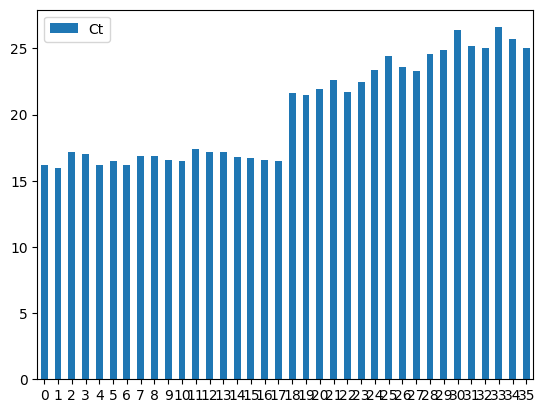

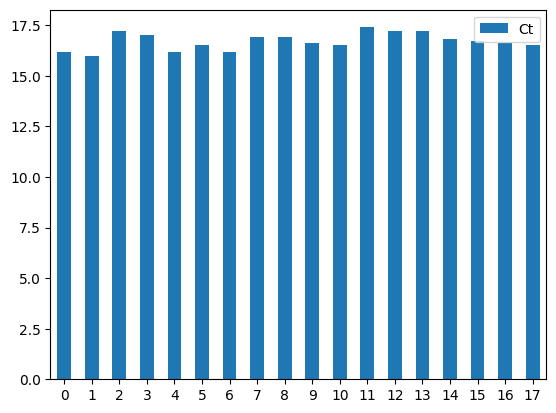

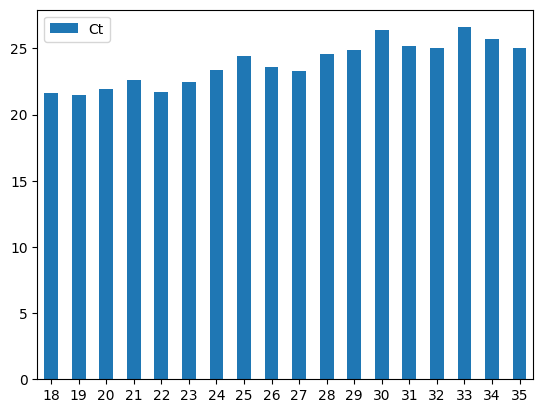

In [17]:
from pandas.core.apply import GroupByApply
from __future__ import print_function
import pandas as pd
pd.__version__


#Read in sample data ##Note, correct name header
qPCR_df = pd.read_csv("https://raw.githubusercontent.com/chrisnelsonlab/BMEG4983/master/qPCR_pseudo.csv", sep=",")


#First let's check to see if the technical replicates are similiar
qPCR_df = qPCR_df.sort_values(["Gene Target", "Treatment", "Biological replicate"], ascending = (True, True, True))

#Let's reset the index
qPCR_df = qPCR_df.reset_index(drop=True)

#A bar plot that shows all the values in a row. Because we sorted, the values
#next to each other should be the technical replicates.
qPCR_df.plot.bar(rot=0, y='Ct')
#What we are looking for here is any crazy outliers from a bad sample.
#Important: Do not discard data. If a technical replicate reads very high or
#very low, that may be a reason to discard later, but always keep all data.

#That was too busy, let's try just GAPDH
qPCR_df.loc[qPCR_df['Gene Target']== 'GAPDH'].plot.bar(rot=0, y='Ct')

#And now just VEGF
qPCR_df.loc[qPCR_df['Gene Target']== 'VEGF'].plot.bar(rot=0, y='Ct')


#Next, let's average the technical replicates.
df_TR_avg = qPCR_df.groupby(["Treatment", "Biological replicate", "Gene Target"], as_index=False)["Ct"].mean()

# Rename Ct column for clarity
df_TR_avg.rename(columns={"Ct": "Ctmean"}, inplace=True)

# Display the resulting DataFrame
print(df_TR_avg)

#Now we need to get the average of the no treatment groups (Group A) for both genes

# Filter for Treatment A
df_A = df_TR_avg[df_TR_avg["Treatment"] == "A"]

#Only the three values for GAPDH
ctmean_gapdh = df_A[df_A["Gene Target"] == "GAPDH"]["Ctmean"]

#only the three values for VEGF
ctmean_vegf = df_A[df_A["Gene Target"] == "VEGF"]["Ctmean"]

GAPDHmean = ctmean_gapdh.mean()
VEGFmean = ctmean_vegf.mean()


print(f"Average Ctmean for GAPDH in Treatment A: {GAPDHmean:.2f}")
print(f"Average Ctmean for VEGF in Treatment A: {VEGFmean:.2f}")

delta_Cts = []
for i in range(len(df_TR_avg)):
  if(df_TR_avg.loc[i, 'Gene Target']=='VEGF'):
    delta_Cts.append(df_TR_avg.loc[i, 'Ctmean']-VEGFmean)

  elif(df_TR_avg.loc[i, 'Gene Target']=='GAPDH'):
    delta_Cts.append(df_TR_avg.loc[i, 'Ctmean']-GAPDHmean)

  else:
    print('unexpected gene name')

df_TR_avg['deltaCt'] = delta_Cts

#Now for the delta delta Ct, we compare to the reference gene (in this case GAPDH)
#Lets break up our dataframe into two by gene (probably should have done that at the beginning)
grouped = df_TR_avg.groupby(df_TR_avg['Gene Target'])
df_TR_avg_GAPDH = grouped.get_group("GAPDH")
df_TR_avg_GAPDH = df_TR_avg_GAPDH.reset_index(drop=True)

df_TR_avg_VEGF = grouped.get_group("VEGF")
df_TR_avg_VEGF = df_TR_avg_VEGF.reset_index(drop=True)

delta_delta_Cts = []
fold_changes = []
for i in range(len(df_TR_avg_VEGF)):
  delta_delta_Cts.append(df_TR_avg_GAPDH.loc[i,'deltaCt']-df_TR_avg_VEGF.loc[i,'deltaCt'])
  fold_changes.append(2**(df_TR_avg_GAPDH.loc[i,'deltaCt']-df_TR_avg_VEGF.loc[i,'deltaCt']))

df_TR_avg_VEGF['ddCts']=delta_delta_Cts
df_TR_avg_VEGF['Fold Change']=fold_changes



## 5.5.2 Graphing data with seaborn

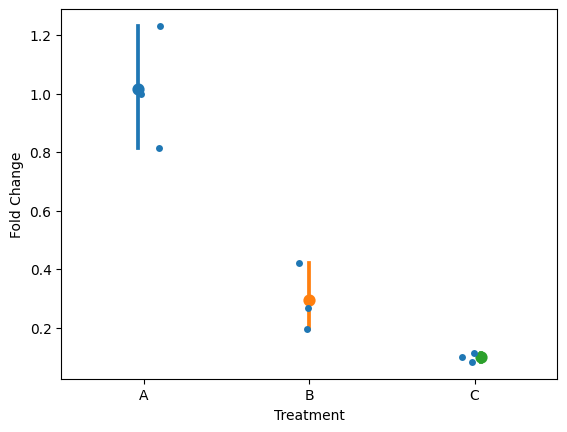

In [18]:
#Now let's plot the fold change
import seaborn as sns

#sns.stripplot(x=df_TR_avg_VEGF['Treatment'], y=df_TR_avg_VEGF['Fold Change'], jitter=False)
sns.stripplot(x="Treatment", y="Fold Change", data=df_TR_avg_VEGF)

ax=sns.pointplot(x="Treatment", y="Fold Change", hue='Treatment',data=df_TR_avg_VEGF,linestyle='none',dodge=True)


#And do some stats.

## 5.5.3 Statistics

In [ ]:
#If we do a t-test, Should we account for multiple comparisons?
#Consider how you would accomplish this.

#Consider using built in tools:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

#5.6 Learning Check

In [ ]:
#@title Learning Check (input answers and hit play button)

#@markdown Q1: I've been to Primer 3 and can design primers for a target gene
answer1 = ' ' #@param [" ","Yes", "No"]

#@markdown Q2: Ture/False, Primers should be on the same strand of DNA
answer2 = ' ' #@param [" ","True", "False"]


#@markdown Q3: Which side of the DNA is on the left when we write sequences

#@markdown If your gene is running from right to left, don't forget to reverse complement
answer3 = " " #@param [" ","5'", "3'"]


#@markdown Q4: PCR can be used for:
answer4 = ' ' #@param [" ","analyzing gene expression", "finding viral copy number","creating constructs for cloning","All of the above"]



if (answer1 == "Yes"):
  print('Q1: Good')
else:
  print('Q1: Go to genome browser!')

if (answer2 == "False"):
  print('Q2: Good')
else:
  print('Q2: One primer should be on the opposite strand')

if (answer3 == "5'"):
  print('Q3: Correct')
else:
  print('Q3: Incorrect')

if (answer4 == "All of the above"):
  print('Q4: Correct')
else:
  print('Q4: Incorrect, PCR is a very flexible technique')


Q1: Good
Q2: Good
Q3: Incorrect
Q4: Incorrect, PCR is a very flexible technique


#5.7 Homework 5

## 5.7.1 Homework 5 Question 1
Design qRT-PCR primers for your gene.
Considerations:
1. They should be exon spanning if possible
2. They should make an amplicon between 60-120 bp.
3. Use a human transcriptome as an off-priming search

Example from TP53


```
forward
5'-TGGCCATCTACAAGCAGTCA-3'
reverse
5'-ATAAGATGCTGAGGAGGGGC-3'
```





## 5.7.2 Homework 5, Question 2

What is the sequence created by your PCR primers above?
Make sure not to include introns.

Example answer from TP53
```
>Amplicon
TGGCCATCTACAAGCAGTCAcagcacatgacggaggttgtgaggcgctgc
ccccaccatgagcgctgctcagatagcgatggtctgGCCCCTCCTCAGCA
TCTTAT
```

What is the size of the amplicon created?
```
106 bp
```

## 5.7.3 Homework 5, Question 3
CD44 isoform expression is dysregulated in cancer. You want to design qRT-PCR primers to differentiate between the two isoforms listed below.

a.	https://www.ncbi.nlm.nih.gov/nuccore/NM_000610.4

b.	https://www.ncbi.nlm.nih.gov/nuccore/NM_001001389.2

How would you go about this? How can you tell the difference?
```
Answer
```

What primers would you use?
```
Primer set 1
forward
5'-SEQ-3'
reverse
5'-SEQ-3'

Primer set 2
forward
5'-SEQ-3'
reverse
5'-SEQ-3'
```

```


### 5.7.4 Homework 5, Question 4

You are designing a longitudinal experiment to test the longevity of your gene therapy approach. You collect the attached Cq values for your target gene and control genes based on three different treatment groups over time. Graph your results based on the ∆∆Ct method. Comment briefly on the results.  

Data is available here:
https://github.com/chrisnelsonlab/BMEG4983/blob/master/PS5_qPCR.csv

Raw data here:

https://raw.githubusercontent.com/chrisnelsonlab/BMEG4983/master/PS5_qPCR.csv

FAQ: Time points are days

Consider what you are comparing here. Treatment groups? Time points? Both?


In [ ]:
#Placeholder code if you want to adapt code.
#You can also use excel or your preferred method for data analysis